# Laboratório 5
Material desenvolvido por Henrique Margotte e Aurora Pozo para a disciplina de Aprendizado de Máquina, para o curso de Informática Biomédica da UFPR, semestre 2025/2. Códigos baseados em exemplos da biblioteca scikit-learn e nos notebooks Python do livro "Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina", 2ª edição.

# Exemplo 1: Árvores de Decisão
Árvores de Decisão são um dos algoritmos mais interpretáveis no Aprendizado de Máquina. Seu funcionamento se dá pela criação de uma árvore, com cada ramificação significando uma condição para qual ramo seguir, com as folhas sendo as classes designadas para aquele caminho. Iremos ver na prática o seu funcionamento no laboratório de hoje, utilizando a já conhecida base de dados Iris, nesse primeiro exemplo. Para a Árvore de Decisão, usaremos a DecisionTreeClassifier, do scikit learn.

Outra vantagem desse modelo é que ele não é sensível ao formato das variáveis, que são avaliadas individualmente para realizar a separação. Desse modo, não é necessário normalizar os dados, nem mesmo transformar as variáveis categóricas em numéricas.

In [6]:
# Definindo o ambiente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Carregando o dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Treinando o modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.9333333333333333


Se realizou os exercícios dos últimos laboratórios, verá que não houve nenhuma grande novidade com as Árvores de Decisão, apenas mudamos o classificador utilizado. Mas, uma das vantagens desse modelo, é a interpretação da predição, que muitas vezes pode ser confusa quando temos muitas dimensões de dados. Veremos a seguir como as decisões foram tomadas na árvore!

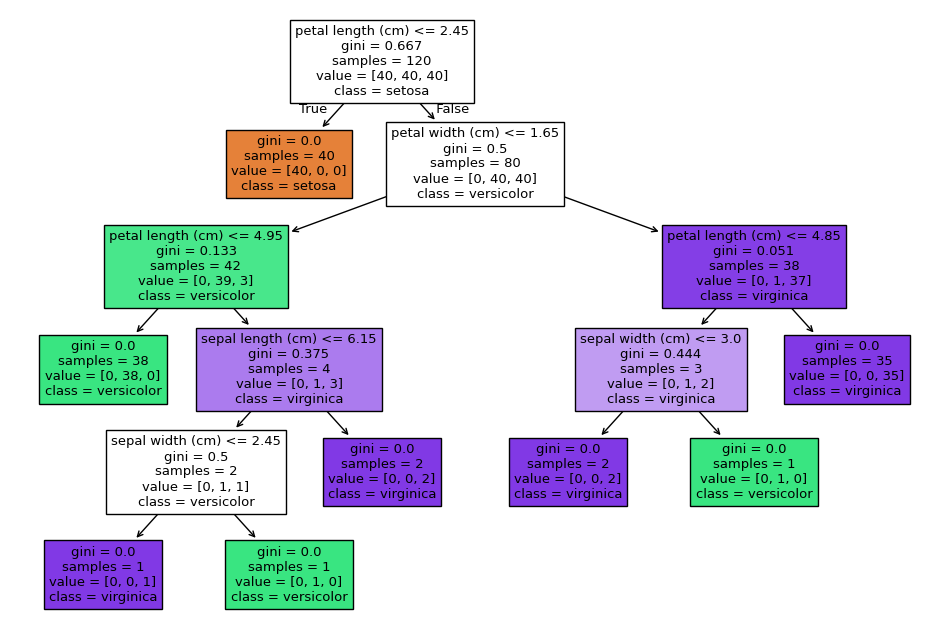

In [7]:
# Visualizando a árvore de decisão
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

Com o gráfico, podemos entender como o modelo realizou a classificação. No exemplo (pode estar diferente em sua máquina!), as instâncias com largura de pétala menor ou igual a 2,5cm foram todas classificadas como da classe setosa, enquanto as demais foram dividas entre as duas outras classes.

O indíce Gini indicado em cada nodo define a impureza deste, calculado pela probabilidade de uma instância ser classificada erroneamente no nodo. Um nodo com Gini 0 representa um nodo em que todos os elementos são da mesma classe. Esse tipo de algoritmo de Árvore de Decisão busca minimizar o indíce Gini.

# Exemplo 2: Avaliando Modelos
Agora, você já sabe três modelos de classificação, o KNN, o Naive Bayes e a Árvore de Decisão, mas como saber qual o melhor para o problema em questão? Ou como saber qual combinação de hiperparâmetros e técnicas de pré-processamento são as mais adequadas? Nós temos realizado comparações a partir da acurácia até aqui, mas ela é suficiente? O quanto esse tipo de comparação fornece um resultado consistente e confiável, e não apenas um acaso das condições aleatórias?

Para fundamentarmos melhor a eficiência de um modelo em resolver um dado problema, existem diversas técnicas que podemos realizar, e que exercitaremos no laboratório de hoje. Esses tipos de procedimentos são especialmente importantes em pesquisa científica, para que resultados consolidados possam ser apresentados em defesa ou contestação de uma dada hipótese, como por exemplo, propor que um modelo performou melhor do que outro.

## Métricas
A acurácia fornece um valor interessante em modelos de classificação, mas ela não é suficiente para representar toda a avaliação de um modelo. Por exemplo, na análise de dados médicos, um modelo pode estar classificando com uma acurácia alta, mas pode estar gerando uma quantidade de falsos negativos (classificando uma pessoa doente como saudável) do que falsos positivos (classificando uma pessoa saudável como doente), o que poderia acarretar em doentes não recebendo o devido tratamento, enquanto os erros no outro sentido teriam sua condição verificada pelo médico. Esse caso seria bem possível em uma análise de larga escala de uma doença rara, em que a grande maioria não possuiria a doença, mas esperaríamos que o modelo pudesse detectar os que possuem sem erros.

Outras métricas, que inclusive já vimos durante os outros laboratórios, podem auxiliar a ter um contexto melhor dos resultados do modelo, como a Matriz de Confusão que já utilizamos, que demonstra a quantidade de acertos e erros (falsos positivos e falsos negativos) para cada uma das classes, mas que pode ser mais difícil de visualizar em problemas multiclasse e que não fornecem métricas fáceis de serem comparadas ou computadas. Para resolver esse problema, podemos calcular métricas próprias a partir desses valores, sendo elas:

- Precisão (*Precision*): proporção de exemplos de uma classe classificados corretamente, dentre todos os classificados nesta classe. $\displaystyle \frac{\text{verdadeiros positivos}}{\text{verdadeiros positivos} + \text{falsos positivos}} \text{;} $
- Revocação (*Recall*): taxa de acerto de cada classe. $\displaystyle \frac{\text{verdadeiros positivos}}{\text{verdadeiros positivos} + \text{falsos negativos}}; $
- F-medida (*F-score* ou *F1-score*): representa o balanceamento entre a precisão e a revocação. $\displaystyle 2 \times \frac{\text{precisão} \times\text{revocação}}{\text{precisão}+\text{revocação}}.$

Também podemos calcular as médias para gerar métricas que representem todo o modelo, sendo elas:

- Média Macro: média das métricas de cada rótulo;
- Média Ponderada (*weighted*): média das métricas de cada rótulo, ponderada pela quantidade de elementos reais de cada classe
- Média micro: métrica global calculada pelo total de verdadeiros positivos, falsos negativos e falsos positivos.

O método `classification_report` do scikit learn já fornece essas métricas, em conjunto com uma coluna `support`, que indica a quantidade de elementos reais daquela classe.

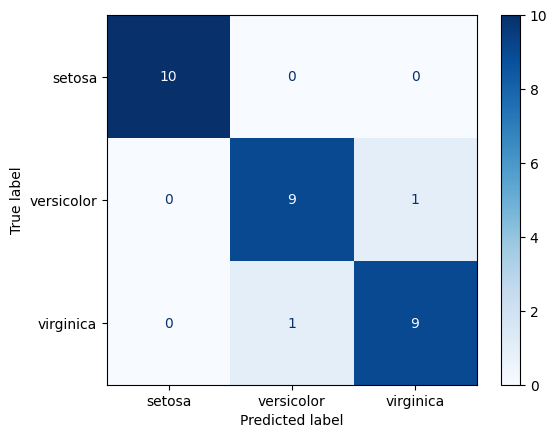

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [8]:
# Gerando a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Relatório de classificação
print(classification_report(y_test, y_pred, target_names=data.target_names))

## Holdout x Validação Cruzada k-fold